In [190]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Function to generate sample data
def generate_sample_data(num_rows=100):
    data = {'Date': [], 'Product': [], 'Sales': [], 'Quantity': []}

    start_date = datetime(2023, 1, 1)
    products = ['Product A', 'Product B', 'Product C']

    for _ in range(num_rows):
        date = start_date + timedelta(days=random.randint(0, 365))
        product = random.choice(products)
        sales = random.uniform(100, 1000)
        quantity = random.randint(1, 10)

        data['Date'].append(date)
        data['Product'].append(product)
        data['Sales'].append(sales)
        data['Quantity'].append(quantity)

    return pd.DataFrame(data)

# Generate sample data with 100 rows
sample_data = generate_sample_data(100)

# Save the sample data to an Excel file
sample_data.to_excel('sample_data.xlsx', index=False)


In [191]:
sample_data

,Date,Product,Sales,Quantity
0,2023-06-13,Product A,535.084527,5
1,2023-08-07,Product C,275.523315,10
2,2023-04-13,Product B,445.765952,10
3,2023-10-30,Product A,998.825958,8
4,2023-11-21,Product B,561.843719,7
...,...,...,...,...
95,2023-02-01,Product C,701.765479,4
96,2023-05-28,Product B,972.548087,10
97,2023-06-20,Product C,341.371116,4
98,2023-03-28,Product B,794.517265,10


In [192]:
import openpyxl
import pandas as pd

def read_excel_data(file_path=r"C:\Users\saura\sample_data.xlsx"):
    """
    Reads data from an Excel file into a pandas DataFrame.

    Parameters:
    - file_path (str): Path to the Excel file.

    Returns:
    - pd.DataFrame: DataFrame containing the data.
    """
    df = pd.read_excel(file_path)
    return df

# Call the function to read data into 'df'
df = read_excel_data()

# Display the DataFrame
print(df)


         Date    Product       Sales  Quantity
0  2023-06-13  Product A  535.084527         5
1  2023-08-07  Product C  275.523315        10
2  2023-04-13  Product B  445.765952        10
3  2023-10-30  Product A  998.825958         8
4  2023-11-21  Product B  561.843719         7
..        ...        ...         ...       ...
95 2023-02-01  Product C  701.765479         4
96 2023-05-28  Product B  972.548087        10
97 2023-06-20  Product C  341.371116         4
98 2023-03-28  Product B  794.517265        10
99 2023-04-27  Product C  400.196748         1

[100 rows x 4 columns]


In [193]:
def analyze_data(dataframe):
    """
    Performs data analysis on a pandas DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): DataFrame containing the data.

    Returns:
    - dict: Dictionary with analysis results.
    """
    analysis_results = {}

    # 1. Total Sales
    total_sales = dataframe['Sales'].sum()
    analysis_results['Total Sales'] = total_sales

    # 2. Average Sales per Product
    average_sales_per_product = dataframe.groupby('Product')['Sales'].mean().to_dict()
    analysis_results['Average Sales per Product'] = average_sales_per_product

    # 3. Total Quantity Sold
    total_quantity_sold = dataframe['Quantity'].sum()
    analysis_results['Total Quantity Sold'] = total_quantity_sold

    # 4. Average Quantity Sold per Product
    average_quantity_per_product = dataframe.groupby('Product')['Quantity'].mean().to_dict()
    analysis_results['Average Quantity Sold per Product'] = average_quantity_per_product

    # 5. Sales Trends Over Time (assuming 'Date' is the column representing date)
    sales_trends_over_time = dataframe.groupby('Date')['Sales'].sum().to_dict()
    analysis_results['Sales Trends Over Time'] = sales_trends_over_time

    return analysis_results


In [194]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_data(analysis_results):
    """
    Creates visualizations based on analysis results.

    Parameters:
    - analysis_results (dict): Dictionary with analysis results.
    """
    # Example 1: Bar chart for Average Sales per Product
    average_sales_per_product = analysis_results['Average Sales per Product']
    plt.bar(average_sales_per_product.keys(), average_sales_per_product.values())
    plt.xlabel('Product')
    plt.ylabel('Average Sales')
    plt.title('Average Sales per Product')
    plt.show()

    # Example 2: Bar chart for Average Quantity Sold per Product
    average_quantity_per_product = analysis_results['Average Quantity Sold per Product']
    plt.bar(average_quantity_per_product.keys(), average_quantity_per_product.values())
    plt.xlabel('Product')
    plt.ylabel('Average Quantity Sold')
    plt.title('Average Quantity Sold per Product')
    plt.show()

    # Example 3: Line chart for Sales Trends Over Time
    sales_trends_over_time = analysis_results['Sales Trends Over Time']
    trends_df = pd.DataFrame(list(sales_trends_over_time.items()), columns=['Date', 'Total Sales'])
    trends_df['Date'] = pd.to_datetime(trends_df['Date'])
    
    plt.plot(trends_df['Date'], trends_df['Total Sales'])
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.title('Sales Trends Over Time')
    plt.show()

# Example usage
input_file = 'sample_data.xlsx'
output_file = 'output_report.xlsx'

#


In [195]:
analysis_results=analyze_data(df)
analysis_results

{'Total Sales': 56640.15784015797,
 'Average Sales per Product': {'Product A': 576.3943071932018,
  'Product B': 557.0464910898842,
  'Product C': 567.343289006153},
 'Total Quantity Sold': 539,
 'Average Quantity Sold per Product': {'Product A': 5.153846153846154,
  'Product B': 6.0,
  'Product C': 5.071428571428571},
 'Sales Trends Over Time': {Timestamp('2023-01-01 00:00:00'): 1866.1703268145038,
  Timestamp('2023-01-02 00:00:00'): 482.0179077826527,
  Timestamp('2023-01-11 00:00:00'): 872.1541537291871,
  Timestamp('2023-01-16 00:00:00'): 809.7364134531723,
  Timestamp('2023-01-18 00:00:00'): 400.0949767887881,
  Timestamp('2023-01-21 00:00:00'): 182.0733145709625,
  Timestamp('2023-01-22 00:00:00'): 113.6109866967418,
  Timestamp('2023-01-24 00:00:00'): 874.8753472401322,
  Timestamp('2023-01-30 00:00:00'): 692.7383064228975,
  Timestamp('2023-01-31 00:00:00'): 564.2626195382106,
  Timestamp('2023-02-01 00:00:00'): 701.7654787778989,
  Timestamp('2023-02-06 00:00:00'): 689.9243913

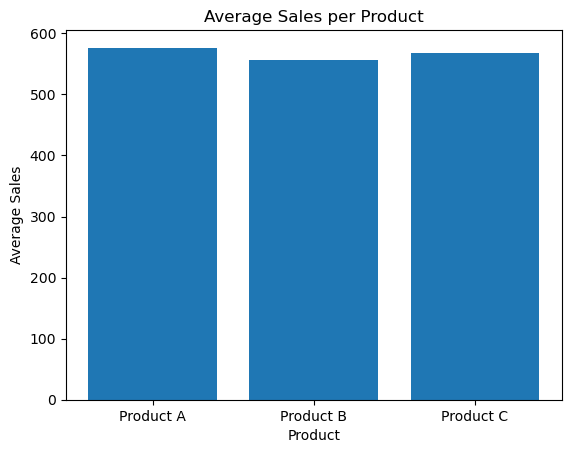

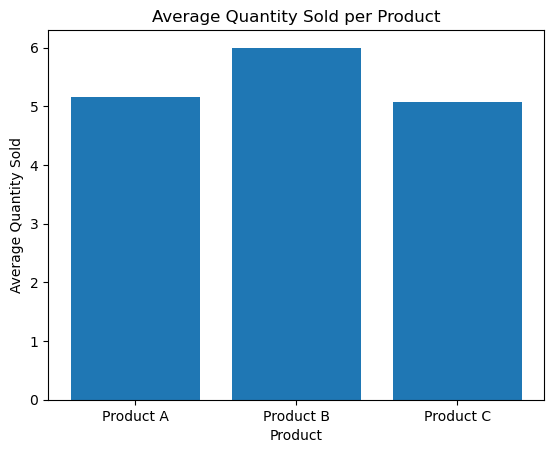

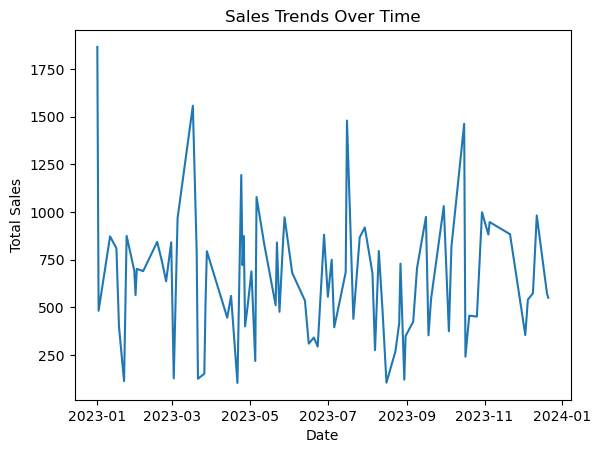

In [196]:
visualize_data(analysis_results)

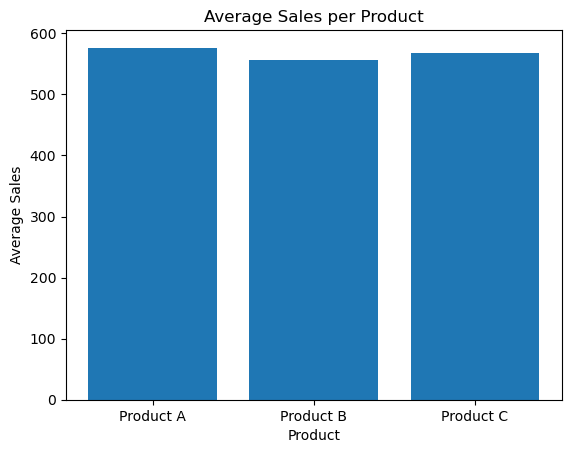

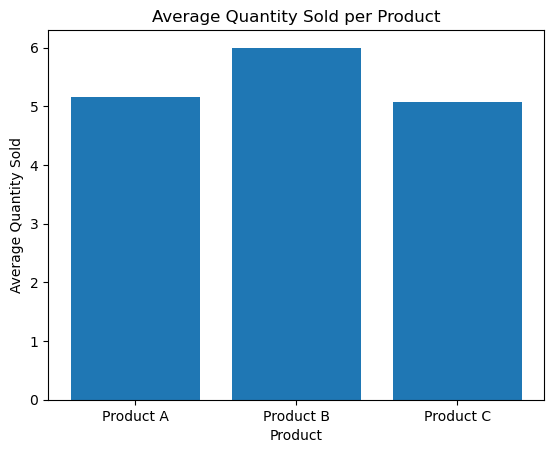

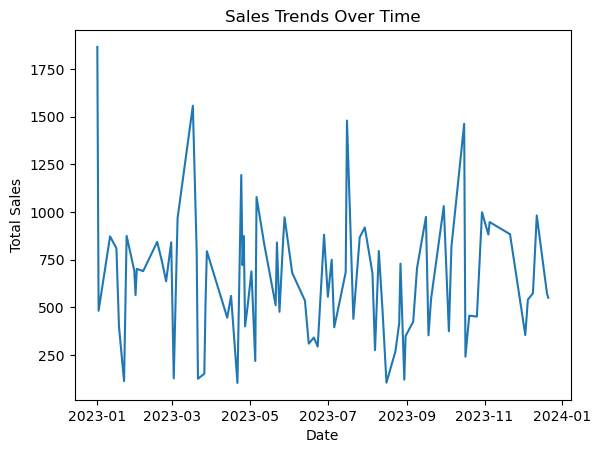

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [197]:
import openpyxl
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image
from io import BytesIO

def generate_report(output_path, analysis_results):
    """
    Generates an Excel report with analysis results and visualizations.

    Parameters:
    - output_path (str): Path to save the Excel report.
    - analysis_results (dict): Dictionary with analysis results.
    """
    # Create a new Excel workbook
    workbook = Workbook()
    sheet = workbook.active

    # Write analysis results to the Excel file
    row_counter = 1
    for analysis_name, result in analysis_results.items():
        sheet.cell(row=row_counter, column=1, value=analysis_name)
        row_counter += 1

        if isinstance(result, dict):
            for key, value in result.items():
                sheet.cell(row=row_counter, column=1, value=key)
                sheet.cell(row=row_counter, column=2, value=value)
                row_counter += 1
        else:
            sheet.cell(row=row_counter, column=2, value=result)
            row_counter += 2  # Skip a row for better readability

    # Save visualizations as images
    images_path = 'images/'
    for i, analysis_name in enumerate(analysis_results.keys()):
        plt.figure(i)
        # Replace spaces with underscores for filenames
        image_filename = f"{analysis_name.replace(' ', '_')}.png"
        plt.savefig(images_path + image_filename, bbox_inches='tight')

        # Insert image into the Excel file
        img = Image(images_path + image_filename)
        sheet.add_image(img, f'E{row_counter+1}')
        row_counter += 15  # Skip rows for better layout

    # Save the Excel file
    workbook.save(output_path)

# Example usage
input_file = 'sample_data.xlsx'
output_file = 'output_report.xlsx'

# Data analysis
data = read_excel_data(input_file)
results = analyze_data(data)

# Data visualization (optional)
visualize_data(results)

# Generate and save the report
generate_report(output_file, results)


In [198]:
def generate_report(output_path, analysis_results):
    """
    Generates an Excel report with analysis results and visualizations.

    Parameters:
    - output_path (str): Path to save the Excel report.
    - analysis_results (dict): Dictionary with analysis results.
    """
    # Create a new Excel workbook
    workbook = Workbook()
    sheet = workbook.active

    # Write analysis results and visualizations to the Excel file
    row_counter = 1
    for analysis_name, result in analysis_results.items():
        sheet.cell(row=row_counter, column=1, value=analysis_name)
        row_counter += 1

        if isinstance(result, dict):
            for key, value in result.items():
                sheet.cell(row=row_counter, column=1, value=key)
                sheet.cell(row=row_counter, column=2, value=value)
                row_counter += 1
        elif isinstance(result, (int, float, str)):
            sheet.cell(row=row_counter, column=2, value=result)
            row_counter += 2  # Skip a row for better readability
        else:
            # Handle other data types or skip them
            pass

    # Save visualizations as images
    images_path = 'images/'
    for i, analysis_name in enumerate(analysis_results.keys()):
        plt.figure(i)
        # Replace spaces with underscores for filenames
        image_filename = f"{analysis_name.replace(' ', '_')}.png"
        plt.savefig(images_path + image_filename, bbox_inches='tight')

        # Insert image into the Excel file
        img = Image(images_path + image_filename)
        sheet.add_image(img, f'E{row_counter+1}')
        row_counter += 15  # Skip rows for better layout

    # Save the Excel file
    workbook.save(output_path)


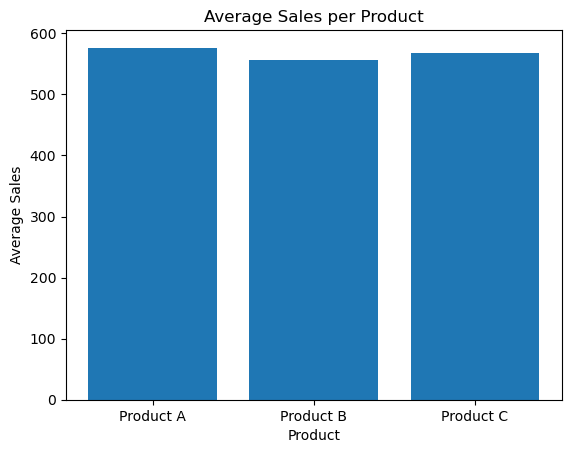

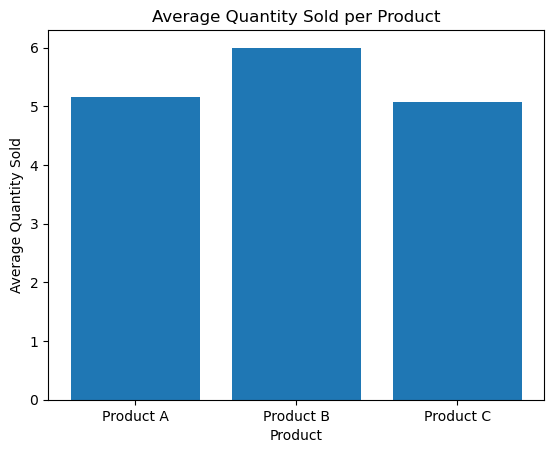

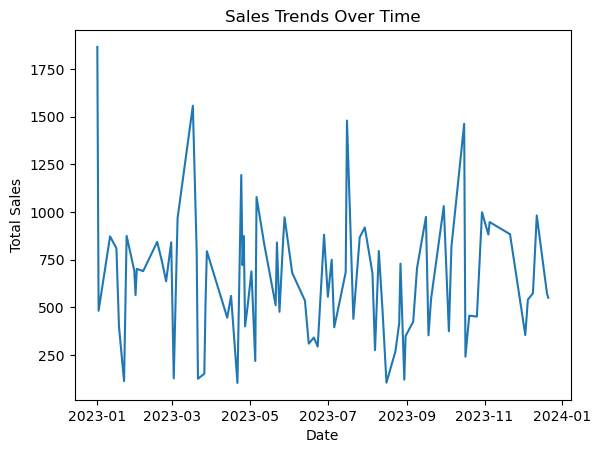

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [199]:

if __name__ == "__main__":
    # Example usage
    input_file = 'sample_data.xlsx'
    output_file = 'output_report.xlsx'

    # Data analysis
    data = read_excel_data(input_file)
    results = analyze_data(data)

    # Data visualization (optional)
    visualize_data(results)

    # Report generation
    generate_report(output_file, results)

